In [ ]:
from data_utils import load_mnist_dataset, prepare_data
from vectorhash import build_scaffold
from hippocampal_sensory_layers import ExactPseudoInverseHippocampalSensoryLayer, IterativeBidirectionalPseudoInverseHippocampalSensoryLayer

shapes = [(3, 3), (4, 4), (5, 5)]
dataset = load_mnist_dataset()
data, noisy_data = prepare_data(dataset, 400)

scaffold, _ = build_scaffold(shapes, 400)

layers = ExactPseudoInverseHippocampalSensoryLayer(
    784, 400, 400, scaffold.H[:400]
)

layers.learn_batch(data)


module shapes:  [(3, 3), (4, 4), (5, 5)]
N_g     :  50
N_patts :  3600
N_h     :  400


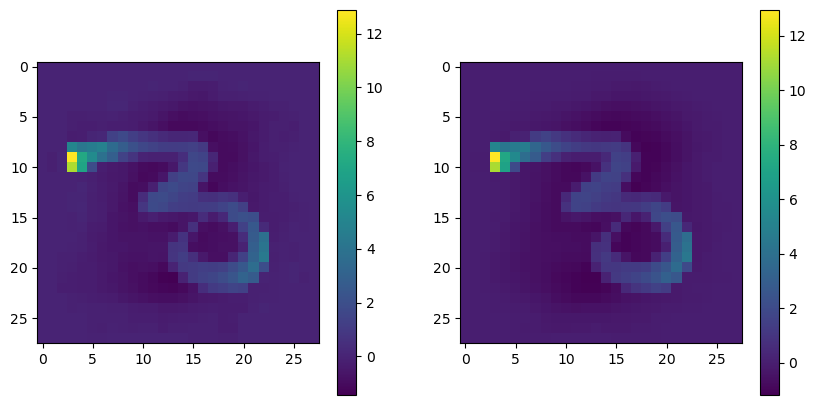

In [36]:
import matplotlib.pyplot as plt

k = 30

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
m1 = layers.sensory_from_hippocampal(scaffold.H[k]).reshape(28,28)
m2 = data[k].reshape(28,28)

a1 = ax[0].imshow(m1)
a2 = ax[1].imshow(m2)
fig.colorbar(a1, ax=ax[0])
fig.colorbar(a2, ax=ax[1])
plt.show()

In [61]:
from tqdm import tqdm

layers = IterativeBidirectionalPseudoInverseHippocampalSensoryLayer(
    784, 400, hidden_layer_factor=3, epsilon_hs=0.1, epsilon_sh=0.1
)

for j in tqdm(range(400)):
    layers.learn(scaffold.H[j], data[j])

  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [01:19<00:00,  5.05it/s]


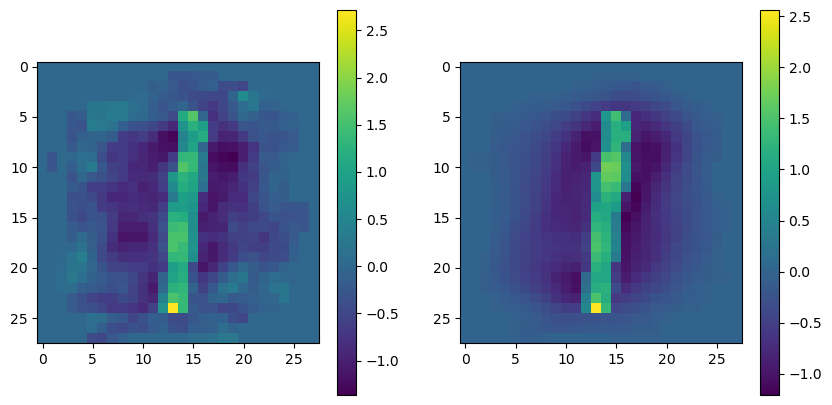

tensor(0.9661)


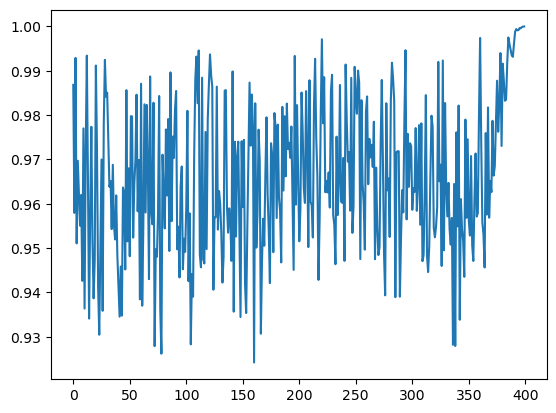

In [62]:
import matplotlib.pyplot as plt
import torch

k = 40

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
m1 = layers.sensory_from_hippocampal(scaffold.H[k]).reshape(28,28)
m2 = data[k].reshape(28,28)

a1 = ax[0].imshow(m1)
a2 = ax[1].imshow(m2)
fig.colorbar(a1, ax=ax[0])
fig.colorbar(a2, ax=ax[1])
plt.show()

import numpy as np
y = [torch.cosine_similarity(layers.sensory_from_hippocampal(scaffold.H[k]), data[k]) for k in range(400)]
plt.plot(np.arange(400), y)
print(torch.mean(torch.Tensor(y)))